In [1]:
import os
import sys
import subprocess

os.environ["FLAGS_allocator_strategy"] = 'auto_growth'
import matplotlib.pyplot as plt
import cv2
import copy
import numpy as np
import json
import time
import logging
from PIL import Image
import tools.infer.utility as utility
import tools.infer.predict_rec as predict_rec
import tools.infer.predict_det as predict_det
import tools.infer.predict_cls as predict_cls
from tools.infer.predict_system import TextSystem
from ppocr.utils.utility import get_image_file_list, check_and_read_gif
from ppocr.utils.logging import get_logger
from tools.infer.utility import draw_ocr_box_txt, get_rotate_crop_image
import argparse
from paddleocr_config import get_config
import glob
logger = get_logger()

# Run below cell to generate OCR result for each image

In [24]:
pretrain_path = '/home/nhungnth/nhung'
# Checkpoint
text_detector = pretrain_path +'/pretrain/en_PP-OCRv3_det_infer.onnx'
text_recognizer = pretrain_path + '/pretrain/PPOCRv3_rec_lisenceplate_17012023.onnx'
use_onnx = True
args = get_config(text_detector = text_detector, text_recognizer=text_recognizer, \
                  use_onnx=use_onnx, use_gpu=False, gpu_mem=0)
# folder contains input images
img_folder = '/home/nhungnth/Data/nhung/DataOCR/OCR_LisencePlate/Collect_From_Internet/VIETNAMESE_LICENSE_PLATE-master/data/image/*'
img_folder = '/home/nhungnth/Data/nhung/DataOCR/OCR_LisencePlate/update_datatrain_20230220/VBI_failed/*'
for path in glob.glob(img_folder):
    args.image_dir =  path
    img_name = args.image_dir.split('/')[-1]
    image_file = args.image_dir
    text_sys = TextSystem(args)
    save_results = []
    total_time = 0
    _st = time.time()
    count = 0

    img = cv2.imread(image_file)
    if img is None:
        logger.debug("error in loading image:{}".format(image_file))

    starttime = time.time()
    dt_boxes, rec_res = text_sys(img)
    elapse = time.time() - starttime
    total_time += elapse

    # for text, score in rec_res:
    #     logger.debug("{}, {:.3f}".format(text, score))
    #print(str(image_file) + "  Predict time of %s: %.3fs" % (image_file, elapse))
    res = [{
        "transcription": rec_res[idx][0],
        "points": np.array(dt_boxes[idx]).astype(np.int32).tolist(),
    } for idx in range(len(dt_boxes))]
    if len(res)>0:
        for box in res:
            x1, x2, x3, x4 = box['points']
            x = [sublist[0] for sublist in box['points']]
            y = [sublist[1] for sublist in box['points']]
            img_textbox = img[np.min(y):np.max(y), np.min(x):np.max(x)]
            # save output ocr predict
            try:
                cv2.imwrite('/home/nhungnth/Data/nhung/DataOCR/OCR_LisencePlate/update_datatrain_20230220/output_VBI_failed/'+img_name+'_'+box['transcription']+'.png', img_textbox)
                #cv2.imwrite('/home/nhungnth/Data/nhung/DataOCR/OCR_LisencePlate/update_datatrain_20230220/output_internet/'+img_name+'_'+box['transcription']+'.png', img[x1[1]:x3[1], x1[0]:x2[0]])
            except:
                print('ERROR IMG: ',img_name )

[('06.916', 0.8140115737915039), ('VI0E', 0.9523884057998657)]
/home/nhungnth/Downloads/check_bienso/resize-1672739229112-785535957-97bed43c-274a-4564-a9d0-46dcb43dfefa.jpg  Predict time of /home/nhungnth/Downloads/check_bienso/resize-1672739229112-785535957-97bed43c-274a-4564-a9d0-46dcb43dfefa.jpg: 0.105s
[{'transcription': '06.916', 'points': [[1347, 426], [1399, 469], [1309, 583], [1257, 541]]}, {'transcription': 'VI0E', 'points': [[1091, 695], [1175, 633], [1198, 666], [1114, 728]]}]


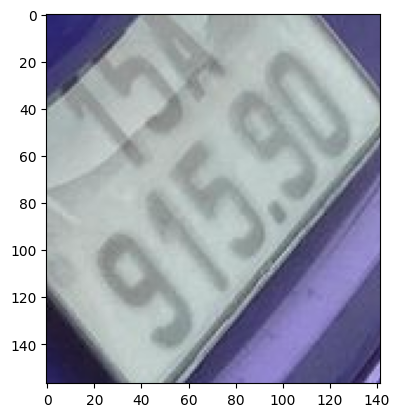

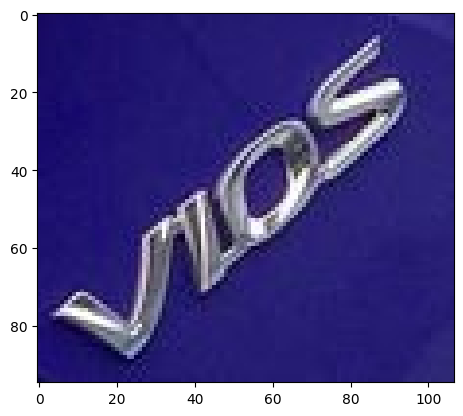

In [34]:
pretrain_path = '/home/nhungnth/nhung'
# Checkpoint
text_detector = pretrain_path +'/pretrain/en_PP-OCRv3_det_infer.onnx'
text_recognizer = pretrain_path + '/pretrain/PPOCRv3_rec_lisenceplate_17012023.onnx'
use_onnx = True
args = get_config(text_detector = text_detector, text_recognizer=text_recognizer, \
                  use_onnx=use_onnx, use_gpu=False, gpu_mem=0)
# path to image
args.image_dir =  '/home/nhungnth/Downloads/check_bienso/resize-1672739229112-785535957-97bed43c-274a-4564-a9d0-46dcb43dfefa.jpg'
image_file = args.image_dir
text_sys = TextSystem(args)
save_results = []
total_time = 0
#cpu_mem, gpu_mem, gpu_util = 0, 0, 0
_st = time.time()
count = 0

img = cv2.imread(image_file)
if img is None:
    logger.debug("error in loading image:{}".format(image_file))

starttime = time.time()
dt_boxes, rec_res = text_sys(img)
print(rec_res)
elapse = time.time() - starttime
total_time += elapse

# for text, score in rec_res:
#     logger.debug("{}, {:.3f}".format(text, score))
print(str(image_file) + "  Predict time of %s: %.3fs" % (image_file, elapse))
res = [{
    "transcription": rec_res[idx][0],
    "points": np.array(dt_boxes[idx]).astype(np.int32).tolist(),
} for idx in range(len(dt_boxes))]
print(res)
img_name = args.image_dir.split('/')[-1]
for box in res:
    x1, x2, x3, x4 = box['points']
    x = [sublist[0] for sublist in box['points']]
    y = [sublist[1] for sublist in box['points']]
    img_textbox = img[np.min(y):np.max(y), np.min(x):np.max(x)]
    plt.figure()
    plt.imshow(img[np.min(y):np.max(y), np.min(x):np.max(x)])
    
    # save output ocr predict
    
    cv2.imwrite('/home/nhungnth/Data/nhung/DataOCR/OCR_LisencePlate/update_datatrain_20230220/'+img_name+'_'+box['transcription']+'.png', img_textbox)

In [21]:
box['points']

[[139, 429], [460, 119], [578, 244], [257, 555]]

In [22]:
x = [sublist[0] for sublist in box['points']]
y = [sublist[1] for sublist in box['points']]

[139, 460, 578, 257]

In [11]:
x1, x2, x3, x4

([173, 209], [335, 91], [403, 186], [240, 305])

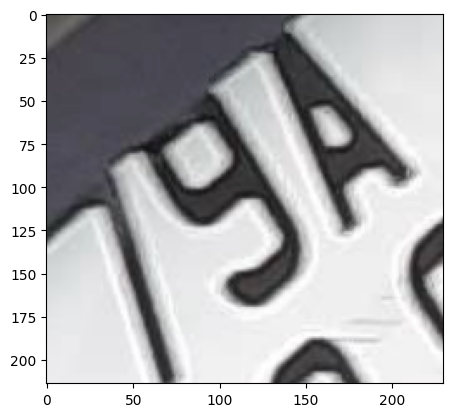

In [16]:
plt.imshow(img[91:305, 173:403])